In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
DATA_PATH = os.path.join(os.getcwd(),'data','FuelConsumptionCo2.csv')
df = pd.read_csv(DATA_PATH)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [4]:
df.duplicated().sum()

0

### Since Data No Null Values , No Dulication , Let's Start Analysis

In [5]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### Predict **CO2EMISSIONS** For New Car  Based On Indpendent Feature **ENGINESIZE**

- **Simple Linear Regression**

### Explore Data Using Graphs

In [6]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

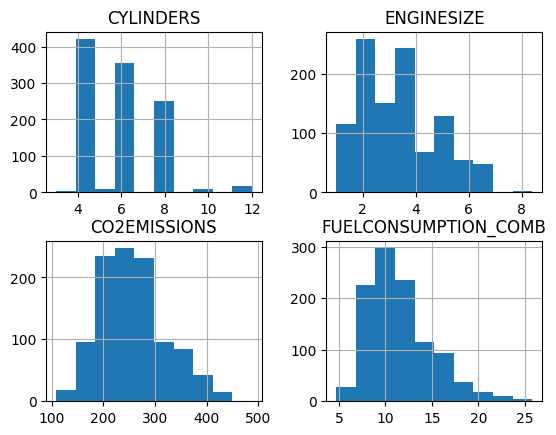

In [7]:
df[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']].hist()
plt.show()

### Plotting Features With CO2EMISSION , Check Their Affect

In [8]:
FList = ['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']
ax = plt.subplot(row,row, row)
plt.scatter(df['CYLINDERS'], df['CO2EMISSIONS'])
ax.set(xlabel='CYLINDERS', ylabel='CO2EMISSIONS', title='Affection of CYLINDERS on amount of CO2EMISSIONS')
plt.show()



NameError: name 'row' is not defined

In [ ]:
FList = ['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']
ax = plt.subplot(row,row, row)
plt.scatter(df['ENGINESIZE'], df['CO2EMISSIONS'])
ax.set(xlabel='ENGINESIZE', ylabel='CO2EMISSIONS', title='Affection of ENGINESIZE on amount of CO2EMISSIONS')
plt.show()


In [ ]:
FList = ['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']
ax = plt.subplot(row,row, row)
plt.scatter(df['FUELCONSUMPTION_COMB'], df['CO2EMISSIONS'])
ax.set(xlabel='FUELCONSUMPTION_COMB', ylabel='CO2EMISSIONS', title='Affection of FUELCONSUMPTION_COMB on amount of CO2EMISSIONS')
plt.show()

### About 82% Form The Data As Train , And 17.7 % From The Data As Test

In [ ]:
msk = np.random.rand(len(df)) < 0.8
train_df = df[msk]
test_df = df[~msk]
len(train)

In [ ]:
(len(train_df)/len(df))*100

In [ ]:
(len(test_df)/len(df))*100

In [ ]:
df.columns

In [ ]:
plt.figure(figsize=(4,3))
plt.scatter(x,y_true)
plt.title('Affect Of car ENGINESIZE on the amount of CO2EMISSIONS')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSIONS')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x = df['ENGINESIZE']
y_true = df['CO2EMISSIONS']

train_x = train_df[['ENGINESIZE']] ## train_df['ENGINESIZE'].values.reshape(-1,1)
train_y = train_df[['CO2EMISSIONS']]

lr = LinearRegression()
lr.fit(np.asanyarray(train_x),train_y)

y_predict = lr.predict(train_x.values.reshape(-1,1))

equation = lr.intercept_+lr.coef_*train_x  ### == y_predict


In [ ]:
plt.scatter(train_x,train_y)
plt.plot(train_x,y_predict,color='red')
plt.title('Engine Size vs CO2 Emission')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emission')
plt.show()

### Check Eation , Predtion Accuracy

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(train_y,y_predict)

In [ ]:
test_x = train_df[['ENGINESIZE']] ## train_df['ENGINESIZE'].values.reshape(-1,1)
test_y = train_df[['CO2EMISSIONS']]

test_predict = lr.predict(test_x)
r2_score(test_y,test_predict)

In [ ]:
plt.scatter(test_x,test_y)
plt.plot(test_x,y_predict,color='red')
plt.title('Engine Size vs CO2 Emission')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emission')
plt.show()